In [ ]:

#data process
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import pandas as pd
import math
from bs4 import BeautifulSoup
import os
import json

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the zip file
zip_path = '/content/drive/My Drive/data.zip'

Mounted at /content/drive


In [ ]:
lstm_wrong_df = pd.read_excel('Scenario 2_ bert_lstm_fine_tuning_wrong guess(7.21.24).xlsx')

In [ ]:
lstm_wrong_df.head(1)

,title,date,content_original,bias,bias_text,source,year
0,senate unanimously pass massive coronavirus ai...,2020-03-25,washington (ap) — house give final approval fr...,1,center,Associated Press,2020


In [ ]:
lstm_wrong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             269 non-null    object        
 1   date              269 non-null    datetime64[ns]
 2   content_original  269 non-null    object        
 3   bias              269 non-null    int64         
 4   bias_text         269 non-null    object        
 5   source            269 non-null    object        
 6   year              269 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 14.8+ KB


In [ ]:

try:
    full_df = pd.read_csv('full_df_7.30.csv', on_bad_lines='skip')

except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25143 entries, 0 to 25142
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   topic             25143 non-null  object
 1   source            25143 non-null  object
 2   bias              25143 non-null  int64 
 3   url               25143 non-null  object
 4   title             25142 non-null  object
 5   date              25143 non-null  object
 6   authors           25143 non-null  object
 7   content           25143 non-null  object
 8   content_original  25143 non-null  object
 9   source_url        25143 non-null  object
 10  bias_text         25143 non-null  object
 11  ID                25143 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.3+ MB


In [ ]:
print(full_df.columns)

Index(['topic', 'source', 'bias', 'url', 'title', 'date', 'authors', 'content',
       'content_original', 'source_url', 'bias_text', 'ID'],
      dtype='object')


In [ ]:
# Ensure there are no leading/trailing spaces in column names
full_df.columns = full_df.columns.str.strip()
lstm_wrong_df.columns = lstm_wrong_df.columns.str.strip()

# Ensure 'title' column is present in both dataframes
assert 'title' in full_df.columns, "The 'title' column is not in full_df"
assert 'title' in lstm_wrong_df.columns, "The 'title' column is not in lstm_wrong_df"

# Ensure 'title' columns are of the same type (e.g., both strings)
full_df['title'] = full_df['title'].astype(str)
lstm_wrong_df['title'] = lstm_wrong_df['title'].astype(str)

# Select only the desired columns from full_df
selected_columns = ['title', 'topic', 'source', 'bias', 'authors', 'content_original', 'bias_text']
full_df_selected = full_df[selected_columns]

# Merge dataframes
full_wrong_guess_answers = lstm_wrong_df.merge(full_df_selected, on='title', how='inner')


In [ ]:
full_wrong_guess_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               269 non-null    object        
 1   date                269 non-null    datetime64[ns]
 2   content_original_x  269 non-null    object        
 3   bias_x              269 non-null    int64         
 4   bias_text_x         269 non-null    object        
 5   source_x            269 non-null    object        
 6   year                269 non-null    int64         
 7   topic               269 non-null    object        
 8   source_y            269 non-null    object        
 9   bias_y              269 non-null    int64         
 10  authors             269 non-null    object        
 11  content_original_y  269 non-null    object        
 12  bias_text_y         269 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory u

In [ ]:
full_wrong_guess_answers['topic'].unique()

array(['federal_budget', 'white_house', 'middle_east', 'politics',
       'cybersecurity', 'us_house', 'fbi', 'elections', 'isis',
       'national_security', 'civil_rights', 'religion_and_faith',
       'us_senate', 'republican_party', 'sports', 'immigration',
       'animal_welfare', 'healthcare', 'gun_control_and_gun_rights',
       'lgbt_rights', 'nuclear_weapons', 'voting_rights_and_voter_fraud',
       'great_britain', 'education', 'labor', 'general_news', 'terrorism',
       'taxes', 'fiscal_cliff', 'violence_in_america', 'polarization',
       'banking_and_finance', 'energy', 'campaign_finance', 'agriculture',
       'trade', 'free_speech', 'media_bias', 'race_and_racism',
       'environment', 'coronavirus', 'defense', 'homeland_security',
       'israel', 'supreme_court', 'justice_department', 'europe',
       'foreign_policy', 'north_korea', 'us_congress', 'democratic_party',
       'culture', 'role_of_government', 'justice', 'ebola',
       'sexual_misconduct', 'us_military

<ipython-input-43-b8e8ea636c44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


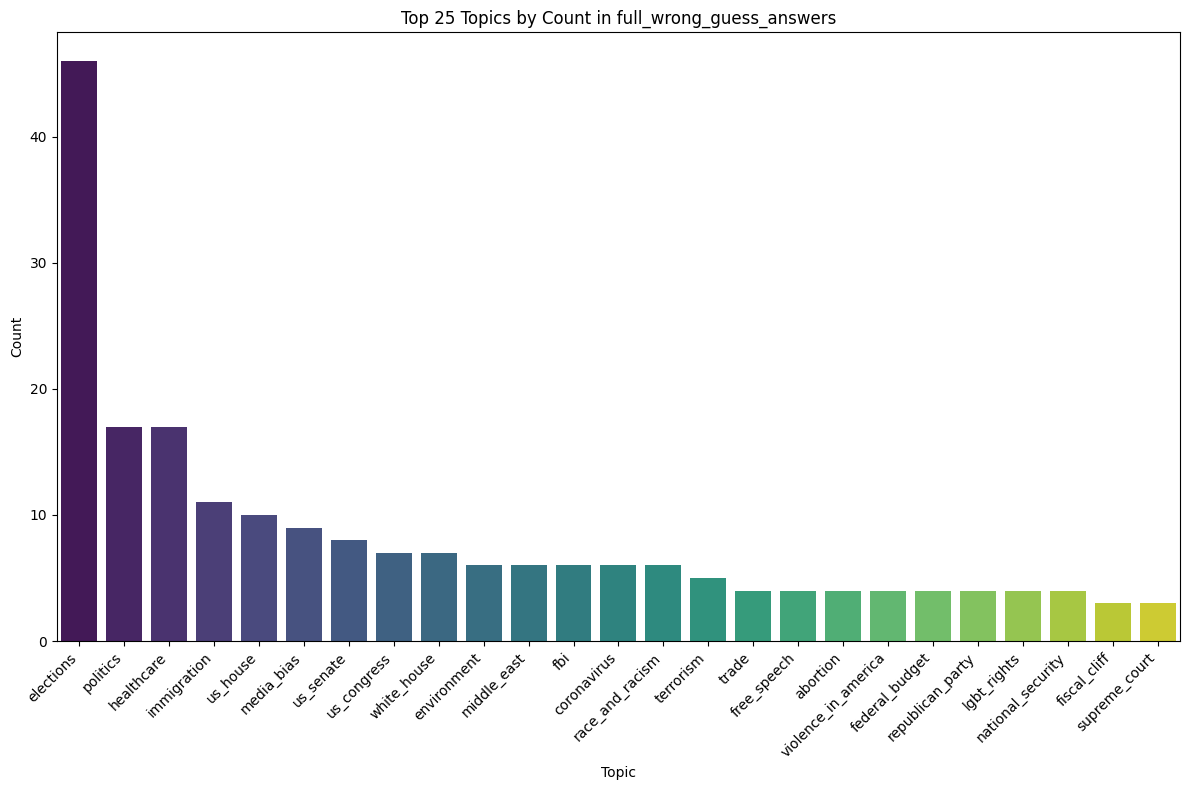

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the unique values in the 'topic' column and select the top 25
topic_counts = full_wrong_guess_answers['topic'].value_counts().head(25)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.title('Top 25 Topics by Count in full_wrong_guess_answers')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Top 10 Topics (with Publication Sources) in the Incorrectly Classified News Articles

<Figure size 1400x800 with 0 Axes>

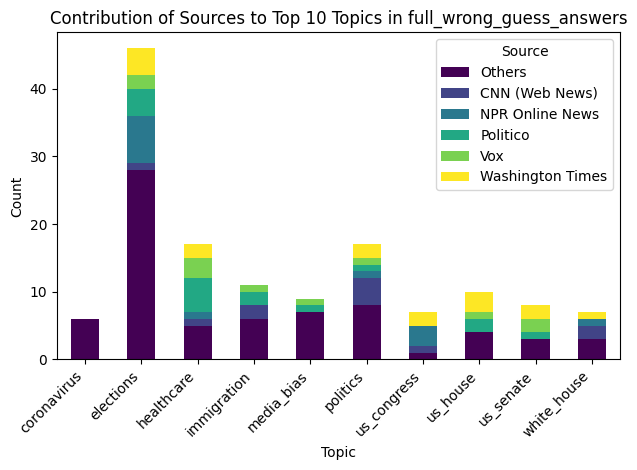

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data by 'topic' and 'source', and count occurrences
topic_source_counts = full_wrong_guess_answers.groupby(['topic', 'source_x']).size().unstack(fill_value=0)

# Select the top 10 topics based on total count
top_topics = topic_source_counts.sum(axis=1).nlargest(10).index
topic_source_counts = topic_source_counts.loc[top_topics]

# Identify the top 5 sources by total count
top_sources = topic_source_counts.sum(axis=0).nlargest(5).index

# Melt the DataFrame to have 'source' as a column
topic_source_counts = topic_source_counts.melt(ignore_index=False, var_name='source_x', value_name='count')

# Replace non-top sources with 'Others'
topic_source_counts['source_x'] = topic_source_counts['source_x'].apply(
    lambda x: x if x in top_sources else 'Others'
)

# Aggregate counts for 'Others'
topic_source_counts = topic_source_counts.groupby(['topic', 'source_x'])['count'].sum().unstack(fill_value=0)

# Ensure that 'Others' is the last category in the legend
if 'Others' in topic_source_counts.columns:
    topic_source_counts = topic_source_counts[['Others'] + [col for col in topic_source_counts.columns if col != 'Others']]

# Plotting the data
plt.figure(figsize=(14, 8))
topic_source_counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='none')

plt.title('Contribution of Sources to Top 10 Topics in full_wrong_guess_answers')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source')
plt.tight_layout()
plt.show()


# Top 50 Topics in the Incorrectly Classified News Articles

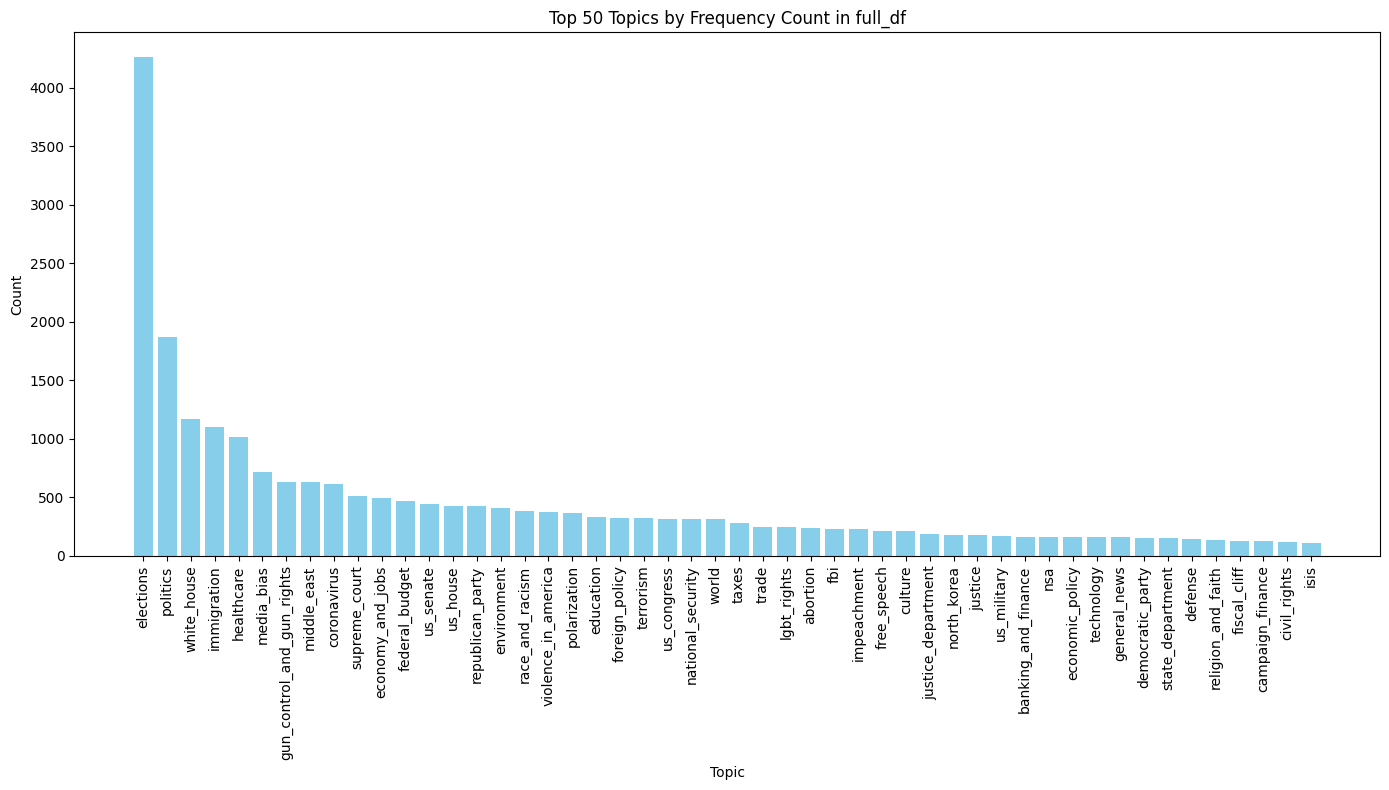

In [ ]:
# Count occurrences of each topic in full_df
topic_counts = full_df['topic'].value_counts()

# Select the top 50 topics
top_50_topics = topic_counts.head(50)

# Convert to DataFrame for better readability (optional)
top_50_topics_df = top_50_topics.reset_index()
top_50_topics_df.columns = ['topic', 'count']

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(top_50_topics_df['topic'], top_50_topics_df['count'], color='skyblue')

plt.title('Top 50 Topics by Frequency Count in full_df')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



# Top 25 Authors in the Incorrectly Classified News Articles

<ipython-input-42-df7869c4f679>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")


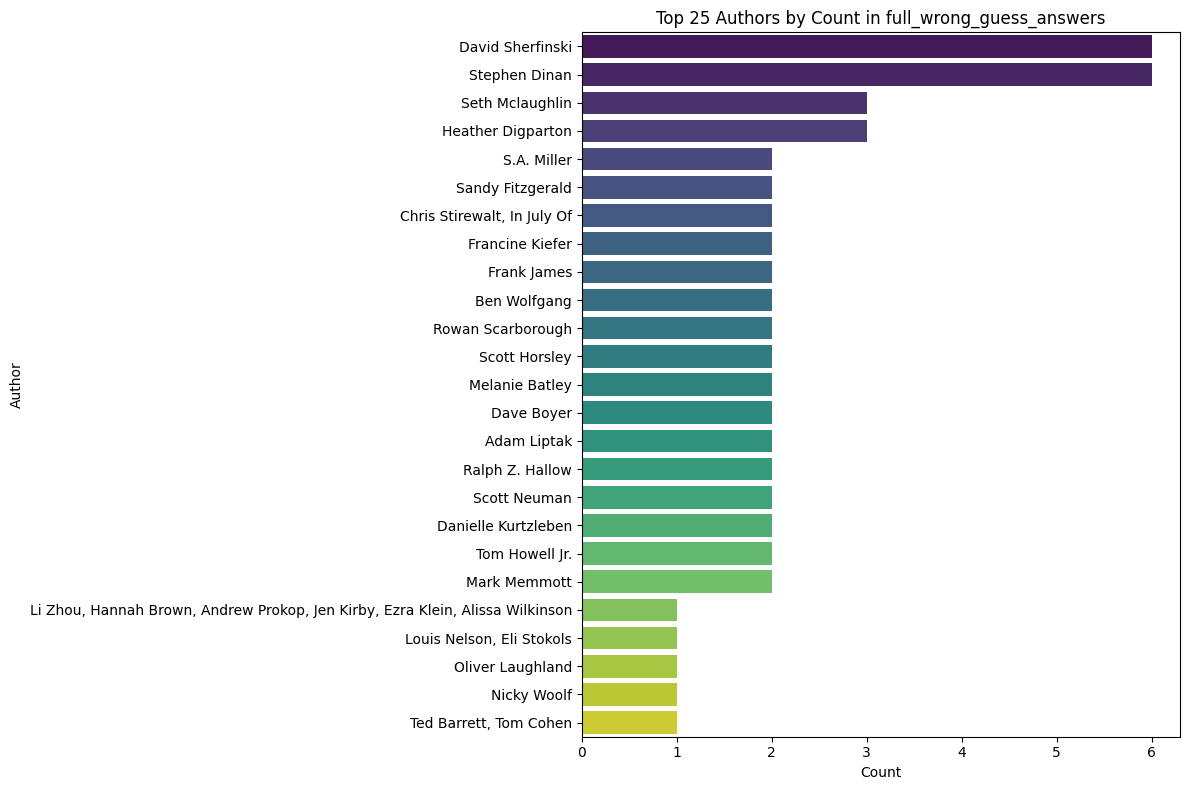

In [ ]:
|
# Count the unique values in the 'authors' column and select the top 25
author_counts = full_wrong_guess_answers['authors'].value_counts().head(25)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")
plt.title('Top 25 Authors by Count in full_wrong_guess_answers')
plt.xlabel('Count')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the length of each entry in 'content_original'
full_wrong_guess_answers['content_length'] = full_wrong_guess_answers['content_original_x'].apply(len)


# Incorrectly Classified News Articles' Overall Content Lengths

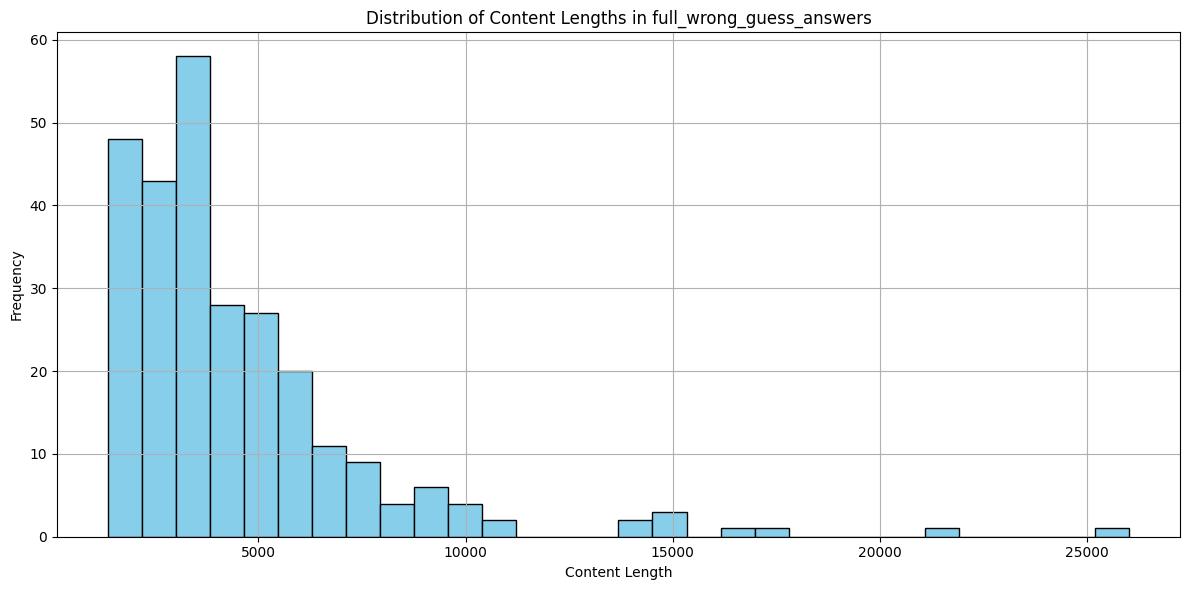

In [ ]:

# Plotting the distribution of lengths
plt.figure(figsize=(12, 6))
plt.hist(full_wrong_guess_answers['content_length'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Content Lengths in full_wrong_guess_answers')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Incorrectly Classified News Articles with Less Than 10K Words' Distribution

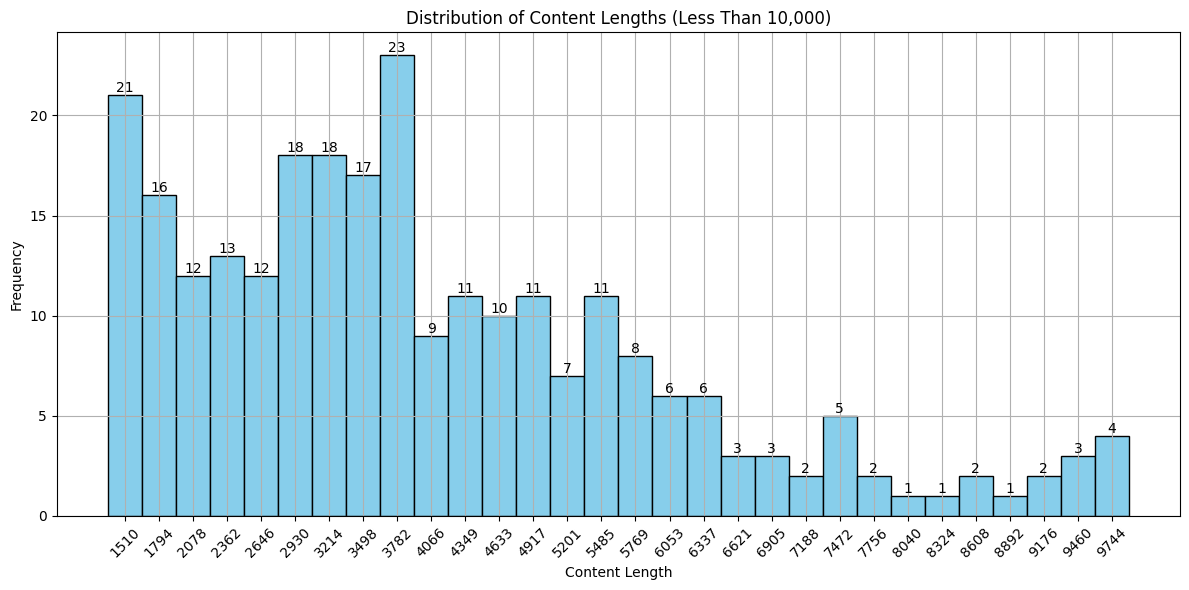

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only content lengths less than 10,000
filtered_df = full_wrong_guess_answers[full_wrong_guess_answers['content_length'] < 10000]

# Plotting the distribution of lengths
plt.figure(figsize=(12, 6))
counts, bin_edges, patches = plt.hist(filtered_df['content_length'], bins=30, color='skyblue', edgecolor='black')

# Adding bin labels
for count, edge in zip(counts, bin_edges):
    plt.text(edge + (bin_edges[1] - bin_edges[0]) / 2, count, f'{int(count)}', ha='center', va='bottom')

# Set x-axis ticks and labels
tick_positions = [edge + (bin_edges[1] - bin_edges[0]) / 2 for edge in bin_edges[:-1]]
tick_labels = [f'{int(edge)}' for edge in tick_positions]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

plt.title('Distribution of Content Lengths (Less Than 10,000)')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Cross Reference Check using Chatgpt & Claude.AI

In [ ]:
# Sample 1 - Input text:
# the stage set battle group walmart wmt the unionbacked group walmart expects thousand worker participate protest planned week.
#employee ask country largest employer end call retaliation speaking better pay, fair schedule affordable health care. such retaliation include shuffling around shifts,
#cutting hour moving around departments. walmart say protester make handful 1. 3 million workforce. in effort stop them, walmart filed complaint last week national labor relation board,
#claiming united food commercial worker union subsidiary known ourwalmart unlawfully organized picket line demonstration past six months. retailer said action disrupted business, worker ongoing
#action violate national labor relation act, prohibits picketing period 30 day without filing petition form union. related : suck work black friday representative federal agency currently holding
#talk walmart headquarters bentonville, arkansas, complaint. nancy cleeland, spokeswoman agency, said email decision agency expected thursday. court wont open day grant injunction thanksgiving holiday,
#meaning action taken time block planned black friday walkout. cleeland said currently 20 charge filed walmart store individual employee walmart alleging number illegal acts. wouldnt say specific charge
#are. our walmart, get financial backing support ufcw, say specifically protesting company retaliation employee doesnt specific demand tied black friday walkout. however, 2011, group asked retailer pay
#worker minimum wage $ 13 per hour make fulltime job available parttime employee want them. also asked retailer provide affordable health care, predictable hour recognize freedom speech association.
#walmart would say percentage worker parttime, much paid average. tovar said majority employee fulltime workers, get average hourly wage $ 12. 40, $ 5 federal minimum wage. jeff landry, employee sapulpa,
# okla., plan join protest. work 4 9 p. m. attending school day. scheduled shift class, landry complained. say manager responded cutting hour 40 30 week. this meant landry longer eligible health care,
# since walmart requires worker work average 30 hour per week get benefits. they tried tactic get rid me, said. landry job despite joining walkout last month, protest started walmart los angeles spread store 12 cities.
#walmart spokesman david tovar said walmart policy prohibits retaliation kind, investigates every allegation. labor law expert say true, employee claim would violate term national labor right act, protects worker kind retaliation.
#angela cornell, director labor law clinic cornell law school, said walmarts complaint might work labor law prohibit picketing 30 day applies protester trying form union gain collective bargaining rights, employee protesting retaliation.
#according william gould iv, chairman nl

# True label:
# 0

# OurFine-Tuned BERT Predicted label (512 Tokens):
# 2

# Chatgpt's Predicted Label (8k Tokens):
# In terms of political ideology bias, the text seems to lean towards a left-leaning perspective. This is because it highlights worker grievances and protests,
#issues related to labor rights, and union involvement. It focuses on concerns about worker exploitation and corporate practices, which are commonly associated with
#left-leaning or progressive viewpoints that advocate for workers' rights and social justice.

# Claude 3.5 Sonet (200k Tokens))
#Based on the content provided, I would assess this text as having a slight left-leaning bias.



# --------------------------------------------------
# Sample 2 - Input text:
# this 2012 presidential race one kind. history crown year debates. and three presidential debate shook race put republican mitt romney back game.
#the history making element 2012 debate year became interactive social medium event attracting massive audiences. rivaled super bowl wrestlemania audience size lust combat american first time communal experience scoring debate real time.
#on twitter blog debate scored minute minute grandma, kid everyone else living room. star hollywood medium personalities, politician joined fun folk home. whole nation competed best oneliners, perfect putdown come back debate taking place.
#trying appear presidential, cagematch mentality sober, thoughtful, reserved approach work social medium world want zinger mock opponent. president obama lost first debate failing satisfy big crowd refusing draw blood. mitt romney similarly lost last debate failing take fight president foreign affairs.
#the second debate, candidate looking verge fistfight, interrupting calling false claim first true debate new rule era. during debates, twitter gave u much hashtags ” big bird, binder bayonets. twitter given birth entirely new debate experience believe new norm presidential debate on.
#i saw historic shift firsthand four debate sites.
#genuinely surprised many colleague – honest, solid, hardworking journalist actually watching debate television computer screens. instead, eye perpetually glued ipads, blackberry iphones reading people saying debate twitter feed facebook posts. that instantaneous scoring distorted reality debate journalist surrogate spin room.
#focus putdowns, oneliners expectation folk tweet dictated said television immediately debates. twitter report 6. 5 million tweet tonight final 90 minute presidential debate, 7. 2 million tweet second debate new york whopping 10. 3 million tweet first debate denver. these metric made first debate tweeted political event sixyear history social networking site.
#prior that, obama ’ s dnc acceptance speech charlotte summer mosttweeted political event. twitter created 2006 report 500 million user worldwide. going year ’ s debate conventional political wisdom political scientist journalist debate don ’ t really matter. time debate clearly made difference 1960, american saw two major party candidate square television first time history.
#image sweaty richard nixon five o ’ clock shadow hurt republican badly. in 13 presidential contest since hard make case presidential debate performance influenced enough voter determine winner presidential election. moments : gerald ford ’ s mistaken judgment soviet influence poland ; george h. w. bush looking watch couldn ’ t wait get there ; al gore ’ s sighing dismissive regard george w. bush.
#the power social medium create distorted, avalanche public opinion happened debate best seen first contest gov. romney president obama. much


# True label:
# 0

# OurFine-Tuned BERT Predicted label (512 Tokens):
# 1

# Chatgpt's Predicted Label (8k Tokens):
#Therefore, the text can be classified as politically neutral or centrist in terms of ideology.
# From the content and tone of the text, it seems relatively neutral and analytical, focusing on the impact of social media on political debates
#rather than explicitly promoting a particular political ideology.
#It does mention both Mitt Romney and President Obama without showing a clear preference or bias towards either.


# Claude 3.5 Sonet (200k Tokens))
#Given these observations, I would classify this text as generally center in its political ideology bias. It presents a relatively balanced view of the debates and focuses more
#on the impact of social media on political discourse rather than advocating for specific political positions.


# --------------------------------------------------
# Input text:
# democrat congress seeking capitalize unrest teacher pay led classroom walkout handful states, offering electionyear plan roll back part last year ’ s gop tax cut boost fund schools,
#including higher wage educators. state local school district would get $ 50 billion decade raise teacher pay recruit educators. plan would provide another $ 50 billion school building resources,
#expand public school teachers ’ collective bargaining rights. the measure among series initiative democrat offering rally core voter ahead election november, every house seat ballot, along third
#senate seats. minority party chambers, democrat lack power bring plan vote. on monday, democrat focused controversy surrounding president donald trump allegation corruption administration, promising
#new ethic rule restriction campaign donation undisclosed contributors. to pay education plan, house minority leader nancy pelosi democratic leader want cancel new tax cut benefit wealthiest 1 percent americans.
#instead giving tax cut richest americans, give pay raise teacher country student depend succeed, ” senate majority leader chuck schumer said news conference. joining democrat leader american federation teacher national education association,
#key donor party candidates. the recent teacher walkout occurred important election battleground state including arizona, gop senator jeff flake retiring, west virginia, incumbent democratic senator joe manchin fighting keep seat. teacher west
#virginia ended nineday strike march 5 percent pay raise. state teacher demonstrated higher pay include oklahoma, kentucky colorado.


# True label:
# 1

# Predicted label:
# 2

# Chatgpt's Predicted Label (8k Tokens):
#TThe text reflects a left-leaning or progressive political ideology due to the focus on increasing funding for education, raising teacher pay, and opposing tax cuts for the wealthiest Americans.


# Claude 3.5 Sonet (200k Tokens))
#While the text does include some factual reporting of events, the overall framing and focus on Democratic proposals and critiques of Republican policies suggest a left-leaning bias. The language used,
#such as "Instead of giving tax cuts to the richest Americans," echoes typical left-wing rhetoric.


